In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\expenses_sample.csv")
df

,Date,Category,Description,Amount
0,2025-07-01,Food,Grocery shopping,850
1,2025-07-01,Transport,Uber ride,120
2,2025-07-02,Utilities,Electricity bill,950
3,2025-07-02,Food,Restaurant,450
4,2025-07-03,Rent,Monthly rent,10000
5,2025-07-03,Entertainment,Movie ticket,300
6,2025-07-04,Transport,Metro,80
7,2025-07-04,Food,Snacks,200
8,2025-07-05,Bills,Internet,700
9,2025-07-05,Others,Gift,400


In [3]:
print("Sum of Amount:",df['Amount'].sum())

Sum of Amount: 14050


In [4]:
print("Expense by Category:")
df.groupby('Category')['Amount'].sum()

Expense by Category:


Category
Bills              700
Entertainment      300
Food              1500
Others             400
Rent             10000
Transport          200
Utilities          950
Name: Amount, dtype: int64

In [14]:
print("Daily/Monthly trends")
df["Date"] = pd.to_datetime(df['Date'])
df.groupby(df['Date'].dt.date)['Amount'].sum()

Daily/Monthly trends


Date
2025-07-01      970
2025-07-02     1400
2025-07-03    10300
2025-07-04      280
2025-07-05     1100
Name: Amount, dtype: int64

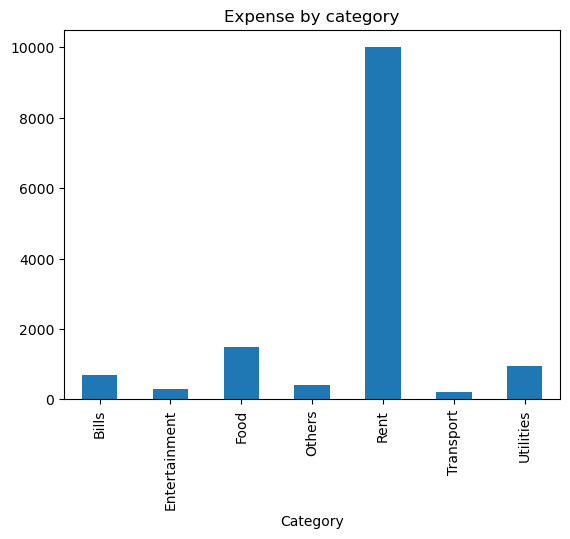

In [6]:
df.groupby("Category")['Amount'].sum().plot(kind = 'bar')
plt.title("Expense by category")
plt.show()

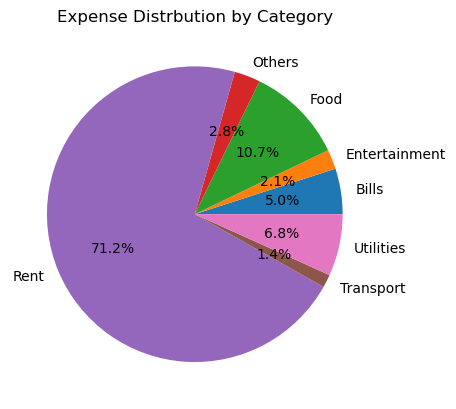

In [7]:
df.groupby("Category")['Amount'].sum().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title("Expense Distrbution by Category")
plt.ylabel("")
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


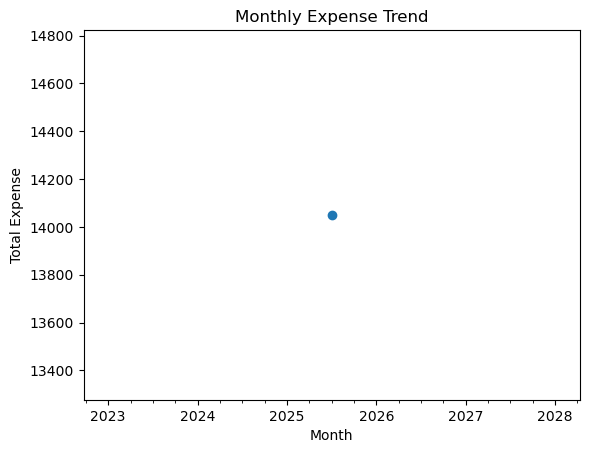

In [8]:
df["Date"] = pd.to_datetime(df['Date'])
df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum().plot(kind = 'line', marker = 'o')
plt.title("Monthly Expense Trend")
plt.xlabel("Month")
plt.ylabel("Total Expense")
plt.show()

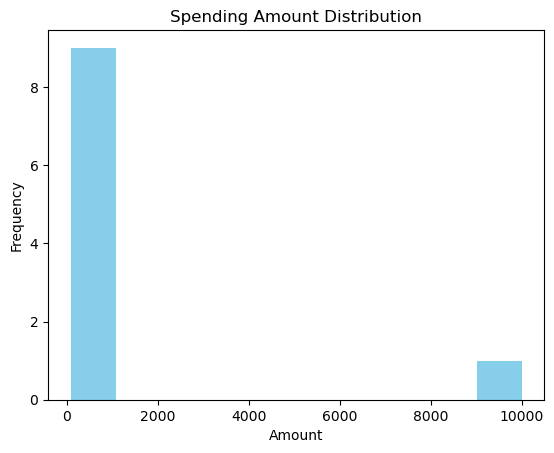

In [9]:
df["Amount"].plot(kind = 'hist', bins = 10, color = 'skyblue')
plt.title("Spending Amount Distribution")
plt.xlabel("Amount")
plt.show()

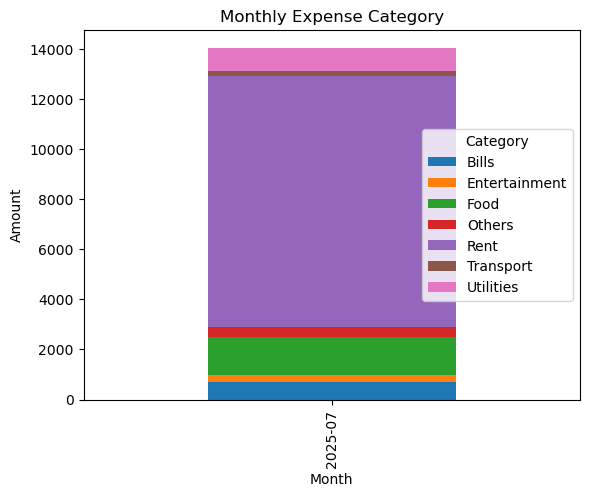

In [10]:
df['Month'] = df['Date'].dt.to_period("M")
monthly_cat_expense = df.pivot_table(index = "Month", columns = "Category", values = "Amount", aggfunc='sum')
monthly_cat_expense.plot(kind = 'bar', stacked = True)
plt.title("Monthly Expense Category")
plt.ylabel("Amount")
plt.show()

In [11]:
max_spent_cat = df.groupby("Category")['Amount'].sum().idxmax()
print("Most spent category:")
max_spent_cat

Most spent category:


'Rent'

In [12]:
monthly_expenses = df.groupby(df['Date'].dt.to_period("M"))['Amount'].sum()
print(monthly_expenses)

Date
2025-07    14050
Freq: M, Name: Amount, dtype: int64


In [13]:
daily_avg = df.groupby(df['Date'].dt.date)['Amount'].sum().mean()
print("Average daily spend:", daily_avg)

Average daily spend: 2810.0


In [15]:
budget = 5000
total_spent = df["Amount"].sum()
if total_spent > budget:
    print("Budget Exceeded")
else:
    print("You're within your budget")

Budget Exceeded


In [16]:
from datetime import datetime
start = datetime(2025, 1,1)
end = datetime(2025, 3, 31)
filtered = df[(df['Date'] >= start) & (df['Date'] <= end)]
print(filtered)

Empty DataFrame
Columns: [Date, Category, Description, Amount, Month]
Index: []
